In [3]:
import numpy as np
import pandas as pd

train = pd.read_csv('train.csv')

In [4]:
train.insert(0, 'Imps', 1)
train['eCost'] = train['click']*train['payprice']

In [5]:
train['OS'],train['browser'] = train['useragent'].str.split('_', 1).str
test['OS'],test['browser'] = test['useragent'].str.split('_', 1).str

In [6]:
stats_train = train[['click','Imps','advertiser','bidprice','payprice','eCost','weekday','hour','region','city','adexchange','usertag','useragent','OS','browser']]
stats_test = test[['click','Imps','advertiser','bidprice','payprice','eCost','weekday','hour','region','city','adexchange','usertag','useragent','OS','browser']]

# Basic Statistics

In [39]:
total_train = train[['click','Imps','advertiser','bidprice','payprice','eCost']]
total_test = test[['click','Imps','advertiser','bidprice','payprice','eCost']]

In [40]:
def t_stats(x):
    x = x.groupby(['advertiser']).sum()
    x['CTR']=x['click']/x['Imps']*100
    x['CPM']=x['payprice']/(x['Imps']/1000)
    x['eCPC']=x['payprice']/x['click']
    x.loc['total'] = np.sum(x)
    x['CTR'] = x['CTR'].astype(str) + '%'
    return x

In [41]:
total_stats_train = t_stats(total_train)
total_stats_train

,click,Imps,bidprice,payprice,eCost,CTR,CPM,eCPC
advertiser,,,,,,,,
1458,385.0,492353.0,147705900.0,33968736.0,37182.0,0.078195928531%,68992.645521,8.823048e+04
2259,43.0,133673.0,38508376.0,12428238.0,4627.0,0.0321680518878%,92974.931362,2.890288e+05
2261,36.0,110122.0,31701699.0,9873779.0,4752.0,0.0326910154193%,89662.183760,2.742716e+05
2821,131.0,211366.0,61343675.0,18828044.0,15699.0,0.0619778015386%,89077.921709,1.437255e+05
2997,217.0,49829.0,13802633.0,3129267.0,19321.0,0.435489373658%,62800.116398,1.442059e+04
3358,202.0,264956.0,61729738.0,22447231.0,22396.0,0.0762390736575%,84720.598892,1.111249e+05
3386,320.0,455041.0,136512300.0,34931823.0,37996.0,0.0703233335018%,76766.319958,1.091619e+05
3427,272.0,402806.0,95218860.0,30458711.0,28161.0,0.0675263029846%,75616.328952,1.119806e+05
3476,187.0,310835.0,77042367.0,23918779.0,18963.0,0.0601605353323%,76950.082841,1.279079e+05


# CTR Analysis

In [7]:
import matplotlib.pyplot as plt
from scipy import stats

In [47]:
def ad_stats1(feature):
   
    stats_train2 = stats_train[stats_train['advertiser'].isin([1458,2259,2261])]
    df2 = stats_train2[['click','Imps','advertiser',feature]]
    df3 = df2.groupby([feature, 'advertiser']).sum()
    df3['CTR'] = df3['click']/df3['Imps']
    df4 = df3.drop(['click','Imps'],axis = 1)
    fig, ax = plt.subplots(figsize=(6,3))
    df4.unstack(level=1).plot(ax=ax)
    plt.show()

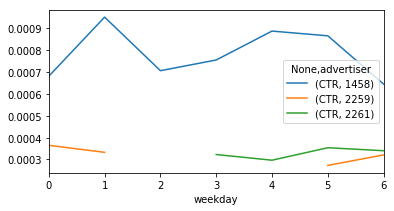

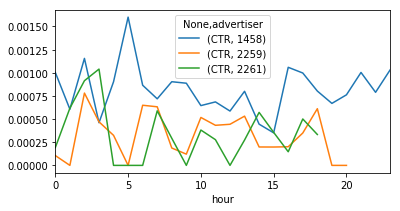

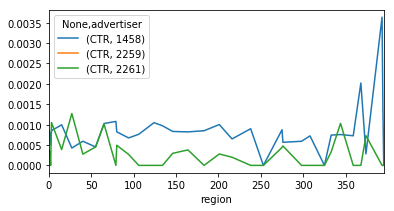

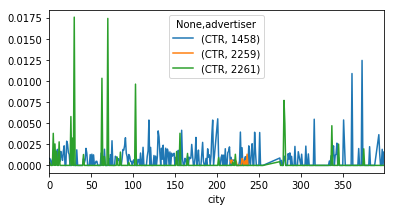

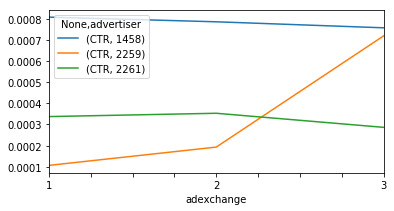

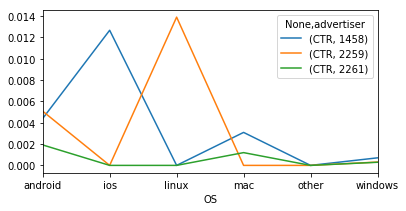

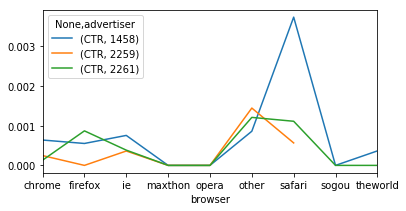

In [48]:
featurelist=['weekday','hour','region','city','adexchange','OS','browser']
for f in featurelist:
    ad_stats1(f)